## Inicjalizacja środowiska programistycznego

In [55]:
#Color printing
from termcolor import colored

#General data operations library
import math
import string
from datetime import datetime
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#append path with python modules
import importlib
import sys
sys.path.append("../modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

#Hide GPU
#tf.config.set_visible_devices([], 'GPU')

<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Analiza obrazów - Zbiór EMNIST

Jako zbiorów treningowych do analizy obrazów użyjemy rozszerzonego zbioru MNIST -
[EMNIST](https://www.nist.gov/itl/products-and-services/emnist-dataset)
zawierającego dużą liczbę zdjęć ręcznie pisanych liter i cyfr. Zdjęcia mają rozdzielczość `28x28` pikseli,
a każdy piksel koduje poziom szarości w 8 bitowej skali.

# Przygotowanie danych

**Proszę:**

* pobrać zbiór [EMNIST](https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip)
* rozpakować plik .zip
* załadować do środowiska Colab, do katalogu `data` pliki (`label` i `images`) dla zbioru `emnist-digits-test`
* rozpakować w środowisku Colab pliki `.gzip`

**Uwaga:**

* pliki są duże. Optymalnie jest je pobrać - na dysk Google lub na lokalny dysk

Dane wczytamy korzystając z gotowej funkcji `getEMNIST(datasetName, datasetPath)` która zwraca krotkę `(features, labels)` dla zbioru o nazwie odpowiadającej nazwie odpowiedniego pliku, np.:
  ```Python
  
  x, y = getEMNIST('emnist-digits-test', datasePath)
  
  ```
  <br></br>

**Proszę:**

* umieścić funkcję w module `modules/emnist_functions.py`  
* rozpakować dane treningowe dla liczb: `emnist-digits-train`
* przeskalować wartości cech do zakresu `[0,1]`
* wydzielić `40 000` przykładów na zbiór uczący
* wydzielić `10 000` przykładów na zbiór walidacyjny

**Uwagi:**

* dane są zapisane w binarnym formacie IDX. Do ich dekodowania można użyć pakietu `idx2numpy`. Pakiet można doinstalować
  do aktualnej sesji korzystając z komendy `pip`. W komórce notatnika komendy linii poleceń trzeba poprzedzić wykrzyknikiem:
  ```Shell
  
  !pip install idx2numpy
  ```
  <br></br>
* zamiast wydzielania explicite zbioru walidacyjnego można użyć parametru `validation_split` metody `keras.model.fit()`:
  ```Python
  
  history = model.fit(x=x_train, y=y_train,
                    epochs=nEpochs,
                    batch_size = batchSize,
                    validation_split=0.1,   # 10% zbioru treningowego wydzielone na zbiór walidacyjny
                    callbacks=callbacks,
                    verbose=0)
  ```

In [56]:
!pip install idx2numpy
!gzip -d data/*

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
gzip: data/*.gz: No such file or directory


In [57]:
def getEMNIST(datasetName, datasetPath):

    import idx2numpy
    fileName = datasetPath+"/"+datasetName+'-images-idx3-ubyte'
    features = idx2numpy.convert_from_file(fileName)

    fileName = datasetPath+"/"+datasetName+'-labels-idx1-ubyte'
    labels = idx2numpy.convert_from_file(fileName)
    return (features, labels)

#BEGIN_SOLUTION
datasetName = "emnist-digits-test"
datasetPath = "../data/EMNIST/gzip/"
features, labels = getEMNIST(datasetName, datasetPath)

nTrainExamples = 30000
nValExamples = 10000
x_train = features[:nTrainExamples]
y_train = labels[:nTrainExamples]

x_val = features[-nValExamples:]
y_val = labels[-nValExamples:]

print(colored("Training data shapes: ","blue"), x_train.shape, y_train.shape)
print(colored("Validation data shapes: ","blue"), x_val.shape, y_val.shape)
#END_SOLUTION
pass

Training data shapes:  (30000, 28, 28) (30000,)
Validation data shapes:  (10000, 28, 28) (10000,)


**Proszę:**

* napisać funkcję `plotMNIST(x, y, y_pred)`, która rysuje cztery losowe obrazy ze zbioru cech `x`, podpisane dwoma rodzajami etykiet
  zawartych w macierzach `y` i `y_pred`
* po dopracowaniu kodu funkcji umieścić ją w module `modules/emnist_functions.py`

**Wskazówka:**
* do rysowania obrazów można użyć funkcji `imshow(imgeData)`

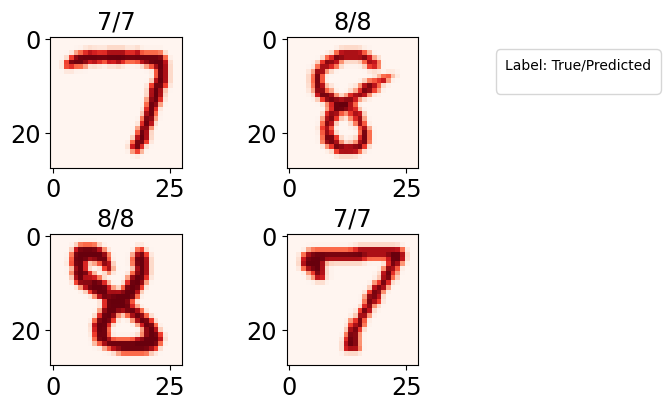

In [58]:
#BEGIN_SOLUTION
def plotMNIST(x, y, y_pred):
    indices = np.random.default_rng().integers(0, len(x), (4))
    fig, axes = plt.subplots(2, 2, figsize=(4.5,4.5))

    for index, axis in zip(indices, axes.flatten()):
        title = "{}/{}".format(y[index],y_pred[index])
        axis.imshow(x[index].T, cmap=plt.get_cmap('Reds'), label="A")
        axis.set_title(title)

    axes[0,1].legend(bbox_to_anchor=(1.5,1), loc='upper left', title="Label: True/Predicted")
    plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.4, hspace=0.5)

plotMNIST(x_train, y_train, y_train)
#END_SOLUTION
pass

**Proszę:**

* wywołać funkcje ładującą dane i rysującą rysunki korzystając z modułu `emnist_functions`

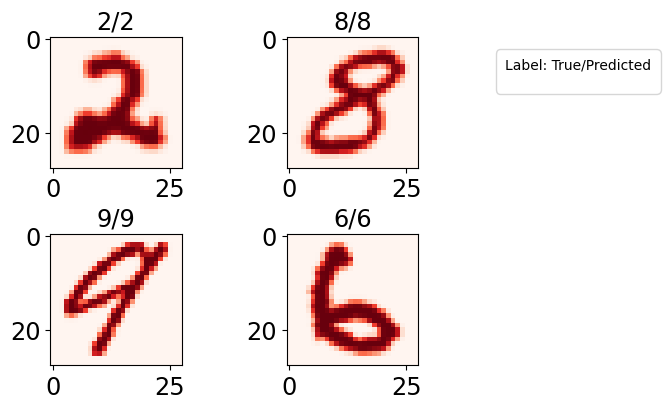

In [59]:
import emnist_functions as emnist_fcn

datasetName = "emnist-digits-train"
datasetPath = "../data/EMNIST/gzip/"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
emnist_fcn.plotMNIST(x, y, y)

**Proszę:**

  * narysować histogramy krotności poszczególnych klas dla zbiorów treningowego i walidacyjnego

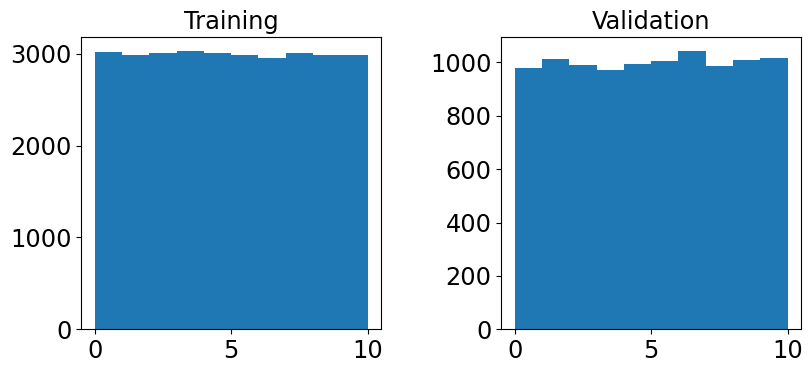

In [60]:
#BEGIN_SOLUTION
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].hist(y_train, bins=np.linspace(0,10,11));
axes[0].set_title("Training")

axes[1].hist(y_val,bins=np.linspace(0,10,11));
axes[1].set_title("Validation")
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.4, hspace=0.5)
#END_SOLUTION
pass

## Rozpoznawanie ręcznie pisanych cyfr

Mamy przed sobą zagadnienie kategoryzacji z wieloma klasami. Etykiety klas są podane w postaci numeru klasy:
```Python
print(y_train[:3])
[8 9 6]
```

Sieć, którą skonstruujemy, będzie estymowała prawdopodobieństwo przynależności do klasy na podstawie cech:

$$
{\huge
f_{g}(x) =  P(g|x)
}
$$

następnie użyjemy klasyfikacji Bayesa przypisując klasę o maksymalnym prawdopodobieństwie:

$$
{\huge
g = argmax_{g \in G} f_{g}(x)
}
$$

Jako funkcji straty użyjemy entropii krzyżowej dla wielu kategorii. Mamy do wyboru dwa warianty:

* `sparse_categorical_crossentropy` - implementacja zakładająca, że etykiety zawierają numery klas

* `categorical_crossentropy` - implementacja zakładająca, że etykiety zawierają wektory prawdopodobieństw przynależności do klas:

```Python
x = tf.one_hot(y_train[:3], 10)
print(x)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(3, 10), dtype=float32)
```  

W naszym przypadku każdy przykład należy do jednej klasy, więc wektor prawdopodobieństw zawiera zera, z wyjątkiem elementu odpowiadającego klasie, do której należy przykład. Taka reprezentacja nazywa się gorąco jedynkową, ang. `one_hot`


* warstwa wyjściowa ma teraz liczbę neuronów równą liczbie klas - każdy neuron zwraca prawdopodobieństwo przynależności do danej klasy
* funkcja aktywacji warstwy wyjściowej powinna być ustawiona na `softmax` by zapewnić normalizację prawdopodobieństwa przykładu do 1:

$$
{\huge
\sum _{g} f_{g}(x) =  1
}
$$

**Proszę:**

* skonstruować sieć w pełni połączoną rozpoznającą ręcznie napisaną cyfrę. Sieć powinna mieć ``128`` neuronów w każdej z
  ``16`` warstw.
* budowa sieci powinna być wykonana z użyciem funkcji `getModel(...)`
* przeprowadzić trening w 20 epokach i narysować zmianę funkcji straty w kolejnych epokach
* trening powienien uwzględniać harmonogram współczennika uczenia
* trening **nie** powinien używać wczesnego zatrzymania - chcemy pobadać efekty zbyt długiego treningu
* obliczyć dokładność, `accuracy` na zbiorach treningowym i walidacyjnym
* skomentować wykresy funkcji straty - **Czy widać na nich oznaki przetrenowania?**

**Uwaga:** proszę zwrócić uwagę na kształt danych wejściowych

Evaluation on training dataset:
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.9815 - loss: 0.0858
Evaluation on validation dataset:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.9651 - loss: 0.1598
CPU times: user 26.6 s, sys: 1.72 s, total: 28.3 s
Wall time: 25.5 s


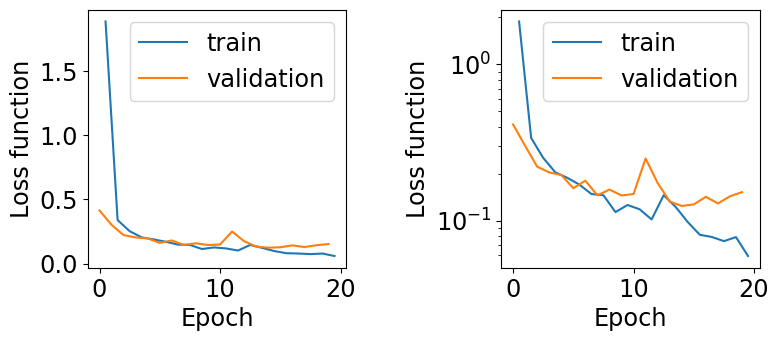

In [61]:
%%time
#BEGIN_SOLUTION
inputShape = (28,28)

nNeurons = np.full((16),128)
nOutputNeurons = 10

def getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear", nOutputNeurons=1):

    inputs = tf.keras.Input(shape=inputShape, name="features")
    x = tf.keras.layers.Flatten()(inputs)

    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation,
                                  bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                  kernel_initializer="HeNormal",
                                  #kernel_regularizer=tf.keras.regularizers.L2(l2=0.01),
                                  name="layer_"+str(iLayer))(x)

    outputs = tf.keras.layers.Dense(nOutputNeurons, activation=outputActivation, name = "output")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    return model

model = getModel(inputShape=inputShape, nOutputNeurons=nOutputNeurons,
                 nNeurons=nNeurons,
                 hiddenActivation="relu",
                 outputActivation="softmax")

#configure learning process
initial_learning_rate = 1E-3
batchSize = 64
nEpochs = 20

nStepsPerEpoch = len(x_train)/batchSize
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=nStepsPerEpoch*10,
                decay_rate=0.95,
                staircase=False)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#run training
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, min_delta=1E-3)
#callbacks = [early_stop_callback]
callbacks = []

history = model.fit(x=x_train, y=y_train,
                    epochs=nEpochs,
                    batch_size = batchSize,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks,
                    verbose=0)
plf.plotTrainHistory(history)
print(colored("Evaluation on training dataset:","blue"))
model.evaluate(x_train, y_train)
print(colored("Evaluation on validation dataset:","blue"))
model.evaluate(x_val, y_val)
#END_SOLUTION
pass

**Proszę:**

* użyć kryterium Bayesa do skonstruowania finalnej odpowiedzi modelu na pytanie **Do której klasy należy dany przykład?**
* narysować macierz pomyłek dla zbioru treningowego i walidacyjnego
* macierze pomyłek proszę znormalizować względem prawdziwych etykiet.

**Wskazówka:** do rysowania macierzy pomyłek można użyć klasy `sklearn.metrics.ConfusionMatrixDisplay`

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step


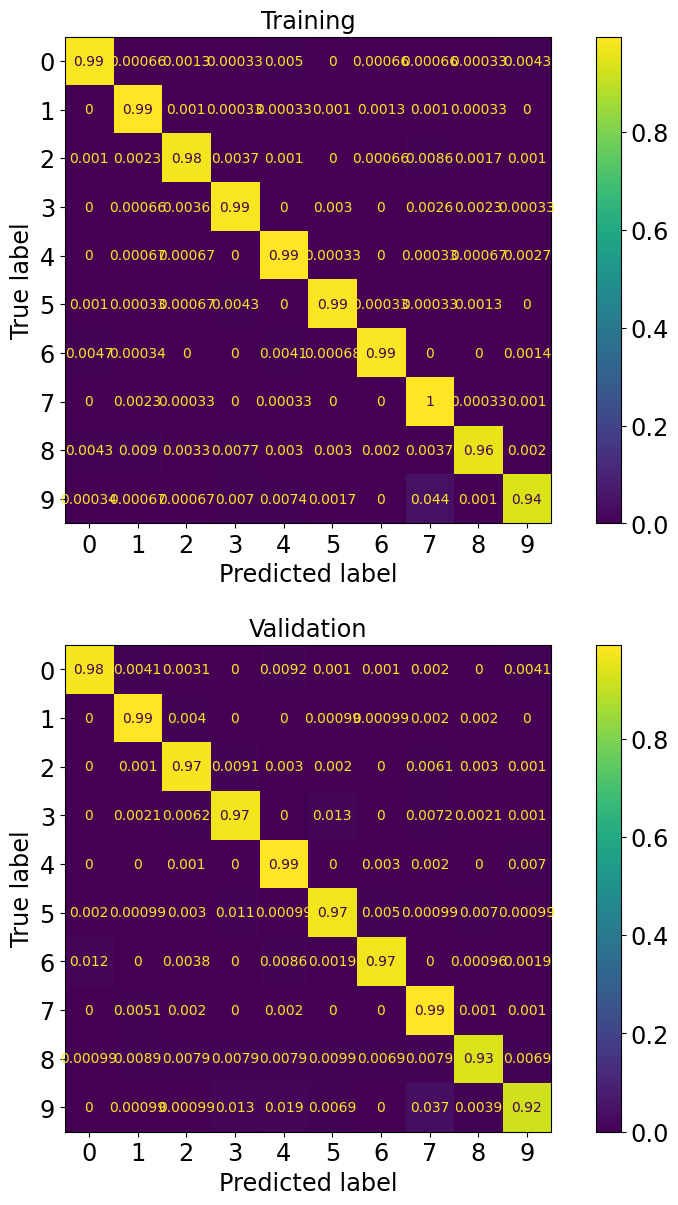

In [62]:
#BEGIN_SOLUTION
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(2, 1, figsize=(10,15))
y_pred = tf.argmax(model.predict(x_train), axis=1)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred, normalize="true", ax=axes[0])

y_pred = tf.argmax(model.predict(x_val), axis=1)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize="true", ax=axes[1])

axes[0].set_title("Training")
axes[1].set_title("Validation")
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.25, hspace=0.25)
#END_SOLUTION
pass

**Proszę:**

* narysować cztery losowe przykłady z informacją etykietach: prawdziwej i przyznanej przez model
* narysować cztery przykłady, w których odpowiedź modelu **nie** jest poprawna

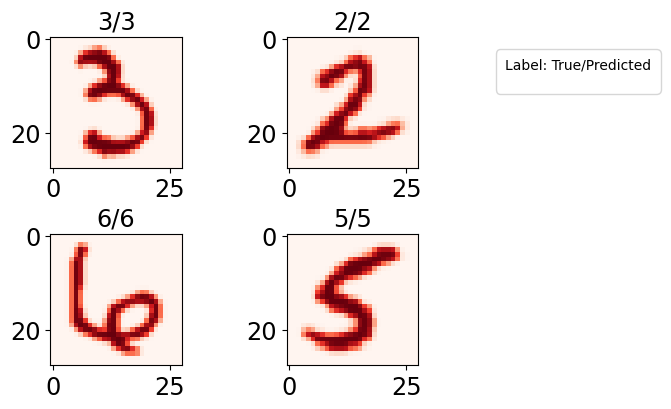

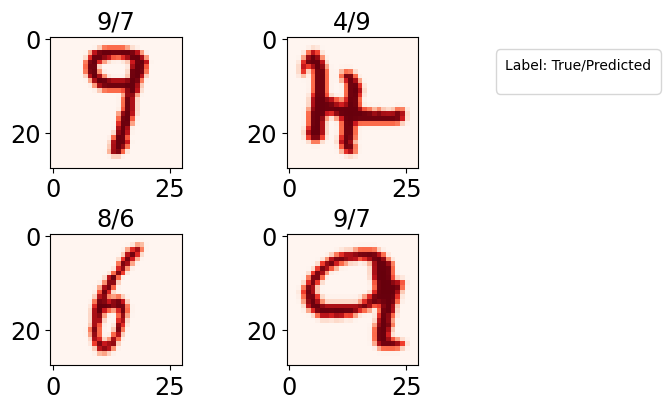

In [63]:
#BEGIN_SOLUTION
plotMNIST(x_val, y_val, y_pred)
mask = y_val!=y_pred
plotMNIST(x_val[mask], y_val[mask], y_pred[mask])
#END_SOLUTION
pass

## Zapis modelu

Model stworzony w Keras może być zapisany w całości - struktura i wagi lub jako same wagi.
W nazwie pliku modelu warto zakodować podstawowe meta dane o treningu, np. datę i liczbę epok.

In [64]:
currentTime = datetime.now().strftime("%b_%d_%Y_%H_%M")
path = "training/{epoch:04d}_"+currentTime+".keras"
model.save(path.format(epoch=nEpochs));

## Wczytywanie modelu

Model można wczytać w dowolnym innym miejscu kodu. Wczytany model pozwala na te same operacje co oryginalny model "z kodu",
w szczególności:

* kontynuację treningu
* wykonanie predykcji

In [65]:
nEpochsSaved = 20
checkpoint_path = "training/{epoch:04d}_"+currentTime+".keras"
model = tf.keras.models.load_model(checkpoint_path.format(epoch=nEpochsSaved))
model.summary()
print(colored("Evaluation on validation dataset:","blue"))
model.evaluate(x_val, y_val)

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,048,351 (4.00 MB)

 Trainable params: 349,450 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 698,901 (2.67 MB)

Evaluation on validation dataset:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9651 - loss: 0.1598


[0.15286757051944733, 0.9674000144004822]

## Zapis modelu w trakcie treningu

Model można automatycznie zapisywać w trakcie procesu treningu - służą do tego dedykowane funkcje wywołań zwrotnych - ```callbacks```. Funkcja ```tf.keras.callbacks.ModelCheckpoint``` zapisuje model w trakcie treningu:

```Python
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                            filepath=checkpoint_filepath, # ścieżka do plików modelu. Wymaga odpowiedniego formatowania
                                                          # jeśli pliki modeli nie mają być nadpisywane, np.:
                                                          # checkpoints/model_{epoch:02d}.keras
                                                          # jeśli zapisyujemy tylko wagi nazwa pliku musi kończyć się na weights.h5
                            save_weights_only=True,       # flaga sterująca zapisem całej struktury modelu, lub jedynie jego wag
                            monitor='val_accuracy',       # kryterium wyboru najlepszego modelu na danym etapie treningu
                            mode='max',                   # kierunek kryterium: max - więcej znaczy lepiej, min - odwrotnie
                            save_best_only=True)          # zapisuje model jeśli jest lepszy niż model poprzednio zapisany
```    

**Proszę:**

* dodać wywołanie zwrotne `ModelCheckpoint` do konfiguracji treningu modelu
* zadbać o odpowiednie nazewnictwo plików modelu

In [66]:
#BEGIN_SOLUTION
#run training
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, min_delta=1E-3)

checkpoint_filepath = 'training/checkpoints/model_checkpoint_epoch_{epoch:02d}.weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                            filepath=checkpoint_filepath,
                            save_weights_only=True,
                            monitor='val_accuracy',
                            mode='max',
                            save_best_only=True,
                            verbose=1)
callbacks = [early_stop_callback, model_checkpoint_callback]

nEpochs = 100
history = model.fit(x=x_train, y=y_train,
                    epochs=nEpochs,
                    batch_size = batchSize,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks,
                    verbose=0)
#END_SOLUTION
pass


Epoch 1: val_accuracy improved from -inf to 0.97140, saving model to training/checkpoints/model_checkpoint_epoch_01.weights.h5

Epoch 2: val_accuracy improved from 0.97140 to 0.97260, saving model to training/checkpoints/model_checkpoint_epoch_02.weights.h5

Epoch 3: val_accuracy improved from 0.97260 to 0.97420, saving model to training/checkpoints/model_checkpoint_epoch_03.weights.h5

Epoch 4: val_accuracy did not improve from 0.97420

Epoch 5: val_accuracy did not improve from 0.97420

Epoch 6: val_accuracy did not improve from 0.97420

Epoch 7: val_accuracy did not improve from 0.97420

Epoch 8: val_accuracy did not improve from 0.97420
Epoch 8: early stopping


## Wczytywanie wag.

Jeśli w trakcie treningu zapisywano same wagi, trzeba je wczytać do istniejącego modelu:
```Python
checkpoint_path = "training/checkpoints/model_checkpoint_epoch_01.weights.h5"
model.load_weights(checkpoint_path)
model.summary()
```

**Proszę:**

* stworzyć nowy model
* obliczyć dokładność na zbiorze walidacyjnym - jakiej wartości się spodziewamy dla `surowego` modelu?
* wczytać wagi modelu zapisane przez funkcję ``tf.keras.callbacks.ModelCheckpoint``
* obliczyć dokładność na zbiorze walidacyjnym. Czy widać, że model zawiera wagi będące efektem treningu?

In [67]:
#BEGIN_SOLUTION
model = getModel(inputShape=inputShape, nOutputNeurons=nOutputNeurons,
                 nNeurons=nNeurons,
                 hiddenActivation="relu",
                 outputActivation="softmax")

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(colored("Evaluation on validation dataset:","blue"))
model.evaluate(x_val, y_val)

checkpoint_path = "training/checkpoints/model_checkpoint_epoch_01.weights.h5"
model.load_weights(checkpoint_path)
model.summary()

print(colored("Evaluation on validation dataset:","blue"))
model.evaluate(x_val, y_val)
#END_SOLUTION
pass

Evaluation on validation dataset:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0972 - loss: 219.8444


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1 variables whereas the saved optimizer has 69 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 349,450 (1.33 MB)

 Trainable params: 349,450 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

Evaluation on validation dataset:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.9697 - loss: 0.1512


# Zadanie domowe

Trening klasyfikatora na zbiorze małych liter i cyfr ze zbioru `emnist-balanced-train`.

**Proszę:**

* wczytrać zbiór `emnist-balanced-train` (uwaga pliki są duże i długo ładują się na Colab!)
* wybrać przykłady o numerze klasy mniejszym niż 36, czyli cyfry i małe litery
* zdefiniować i przeprowadzić trening modelu.
  **Kod powinien jedynie używać funkcji zdefiniowanych w komórkach
  zadania domowego i module `emnist_functions`**
* kod treningu i rysowania powinien znaleźć się w odzielnych komórkach
* wypisać na ekran dokładność, `accuracy`, modelu na zbiorach treningowym i `emnist-balanced-test`
* dla zbiorów treningowego i testowego narysować macierze pomyłek z odpowiednimi etykietami na osiach
* wskazać klasy, które słabo się separują
* odkodować komunikat zapisany w pliku [encoded.npz](http://studenci.fuw.edu.pl/~akalinow/encoded.npz)
    * plik zawiera macierz o kształcie `(-1,28,28)` którą można wczytać następująco:
    ```Python
    
    fileName = "encoded.npz"
    with open(fileName, 'rb') as file:
        encoded = np.load(file)
    ```
* odkodowany komunikat wypisać na ekran w postaci napisu:
```Python
Decoded message is: hello world

```    

In [68]:
#Input data loading
#BEGIN_SOLUTION
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

datasetName = "emnist-balanced-train"
datasetPath = "../data/EMNIST/gzip/"
lastClassNumber = 36

x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
mask = y<lastClassNumber
x_train = x[mask]
y_train = y[mask]

datasetName = "emnist-balanced-test"
datasetPath = "../data/EMNIST/gzip/"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
mask = y<lastClassNumber
x_test = x[mask]
y_test = y[mask]

nCategories = len(tf.unique(y_train)[0])

print(colored("Training data shapes:","blue"), x_train.shape, y_train.shape)
print(colored("Test data shapes:","blue"), x_test.shape, y_test.shape)
print(colored("Number of categories:","blue"),nCategories)
#END_SOLUTION
pass

Training data shapes: (86400, 28, 28) (86400,)
Test data shapes: (14400, 28, 28) (14400,)
Number of categories: 36


Epoch 22: early stopping
Evaluation on training dataset:
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 3s 860us/step - accuracy: 0.7336 - loss: 1.8516
Evaluation on test dataset:
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.7238 - loss: 1.9017
CPU times: user 1min 7s, sys: 2.97 s, total: 1min 10s
Wall time: 1min 5s


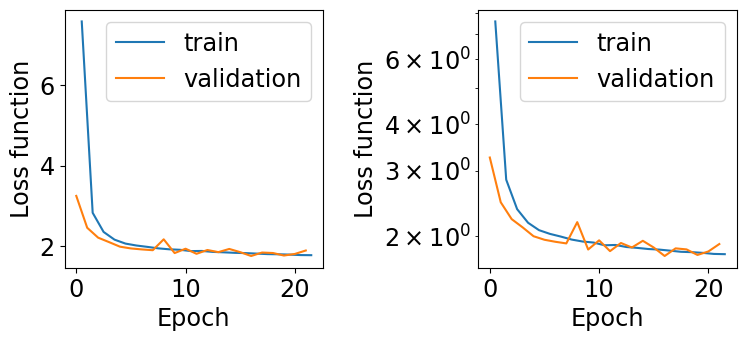

In [73]:
%%time
importlib.reload(emnist_fcn);

#model definition and training
#BEGIN_SOLUTION
inputShape = (28,28)
nNeurons = np.full((16),128)
nOutputNeurons = nCategories

model = emnist_fcn.getModel(inputShape=inputShape, nOutputNeurons=nOutputNeurons,
                            nNeurons=nNeurons,
                            hiddenActivation="relu",
                            outputActivation="softmax")

#configure learning process
initial_learning_rate = 1E-3
batchSize = 64
nEpochs = 200

nStepsPerEpoch = len(x_train)/batchSize
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=nStepsPerEpoch*10,
                decay_rate=0.95,
                staircase=False)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#run training
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, min_delta=1E-3)
callbacks = [early_stop_callback]

history = model.fit(x=x_train, y=y_train,
                    epochs=nEpochs,
                    batch_size = batchSize,
                    validation_split=0.1,
                    callbacks=callbacks,
                    verbose=0)
plf.plotTrainHistory(history)
print(colored("Evaluation on training dataset:","blue"))
model.evaluate(x_train, y_train)
print(colored("Evaluation on test dataset:","blue"))
model.evaluate(x_test, y_test);
#END_SOLUTION

2024-04-09 15:19:36.030268: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 270950400 exceeds 10% of free system memory.


2700/2700 ━━━━━━━━━━━━━━━━━━━━ 2s 825us/step
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step


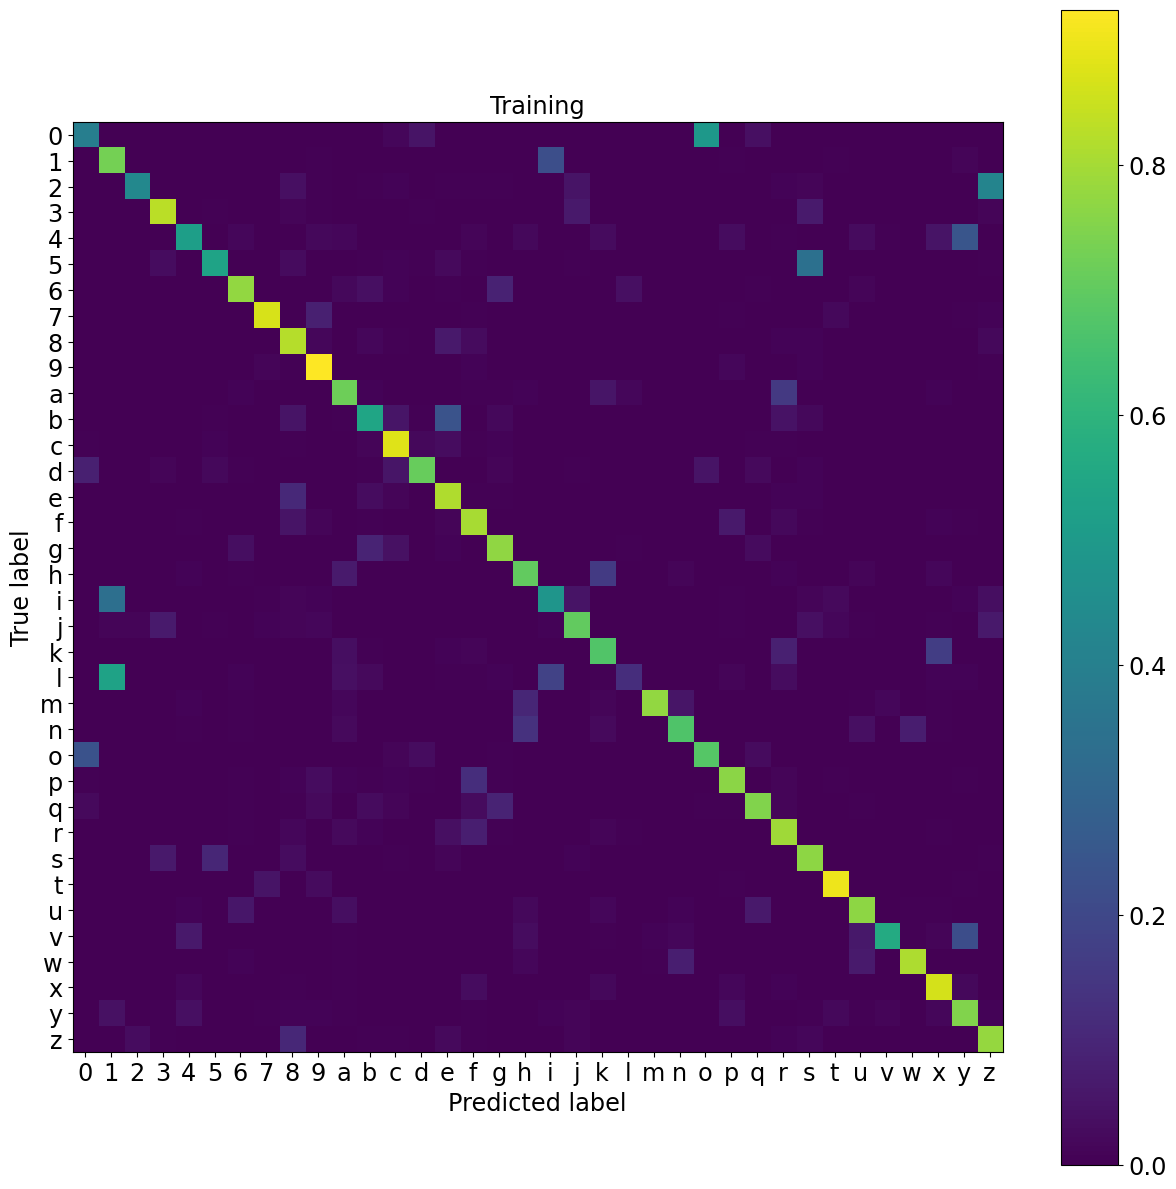

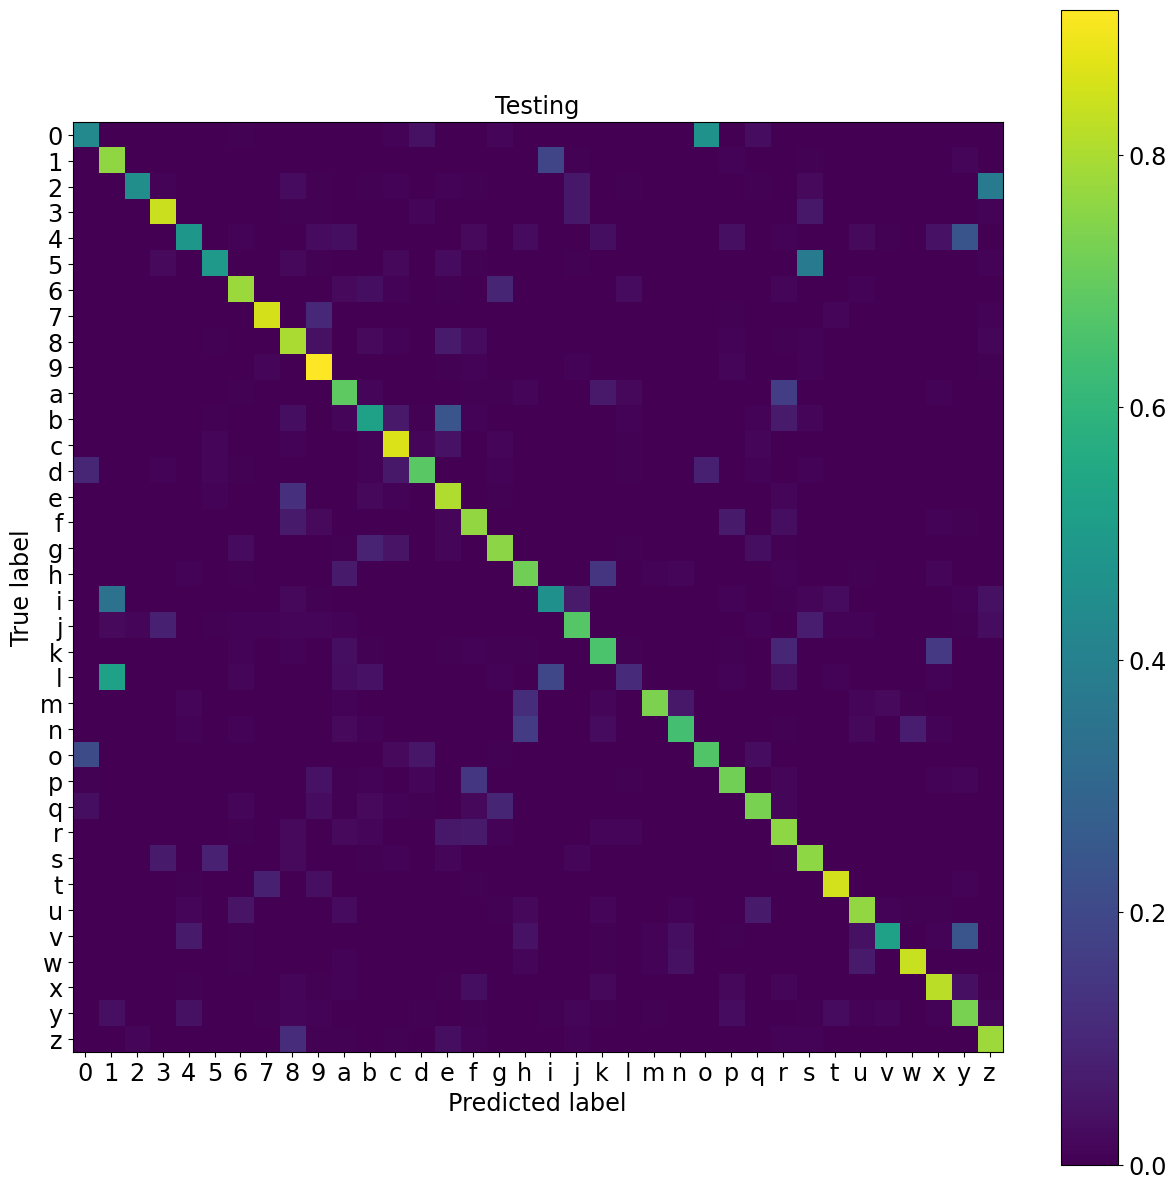

In [70]:
#evaluation
#BEGIN_SOLUTION
y_pred = tf.argmax(model.predict(x_train), axis=1)
emnist_fcn.plotMNIST_CM(y_train,y_pred,"Training")

y_pred = tf.argmax(model.predict(x_test), axis=1)
emnist_fcn.plotMNIST_CM(y_test,y_pred,"Testing")
#END_SOLUTION
pass

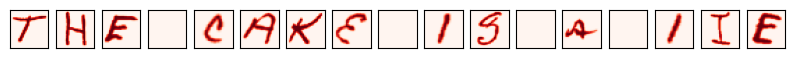

In [71]:
#BEGIN_SOLUTION
#message encoding
importlib.reload(emnist_fcn);
text = "the cake is a lie"
encoded = emnist_fcn.encodeMessage(text,x,y);

fileName = "encoded.npz"
with open(fileName, 'wb') as file:
    np.save(file, encoded)
#END_SOLUTION
pass

In [74]:
#message decoding
#BEGIN_SOLUTION
fileName = "../data/encoded.npz"
with open(fileName, 'rb') as file:
    encoded = np.load(file)

spaces_mask = np.sum(encoded, axis=(1,2))>0
decoded = tf.argmax(model.predict(encoded), axis=1)
digits = [str(item) for item in range(0,10)]
letters_lower = list(string.ascii_lowercase)
digits_letters = np.array(digits + letters_lower)
decoded = digits_letters[decoded]
decoded = np.where(spaces_mask, decoded, " ")
decoded = ''.join(decoded)
print(colored("Decoded message is:","blue"),decoded)
#END_SOLUTION
pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
Decoded message is: t6e cake is a e1e
